In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
(df1.isna() | (df1 == '')).sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
#since we have 73 nulls which is very less compared to the whole dataset, we will drop it!
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
 df3.shape

(13246, 5)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# 4 bedroom and 4BHK is same so
#use lambda func

df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))
# x.split gives 2 tokens, we take the first one ie 0 which is no and convert it into int

C:\Users\User\AppData\Local\Temp\ipykernel_18824\1730883330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [12]:
# we get new bhk col
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
# We observe that we have a 43 bhk suprisingly, to chk, if its legitimate

df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### Thing to notice here is that sqft is just 2400, which implies towards error 

In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### '1133 - 1384' kinda ranged data needs to be converted into 1 number...we may take average

In [16]:
#This code is trying to filter out rows in the DataFrame df3 where the total_sqft column cannot be converted to a float. Essentially, it identifies non-numeric or improperly formatted values in the total_sqft column.


def is_float(x):
    try:
        float(x) # try to convert all val to float and incase its in range we get false
    except:
        return False
    return True

- is_float() checks if a value can be converted to a float.
- apply(is_float) applies this function to every value in the total_sqft column.
- The ~ symbol negates the boolean output, meaning it selects rows where the conversion fails (i.e., non-numeric values).

In [17]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


## 🚩 Problems with the total_sqft Column
The total_sqft column contains inconsistent data formats, which can cause issues during data cleaning, analysis, or model building. Here are the key problems:


```1️⃣ Ranges Instead of Single Values```
Example: 2100 - 2850, 3067 - 8156, 1042 - 1105
Issue: These are ranges, not single values, which makes it impossible to convert them directly to float for numerical analysis.
Solution:
- Option 1: Take the average: 2100+2850/2=2475
- Option 2: Choose either the minimum or maximum based on the requirement.

```2️⃣ Non-Numeric Units Attached```
Example: 34.46Sq. Meter, 4125Perch
Issue: Text like Sq. Meter and Perch are appended to the number, causing conversion errors when attempting to convert to float.
Solution:
- Use regex or string manipulation to remove non-numeric characters.
- Convert to a standard unit (e.g., square feet) if needed.

```3️⃣ Completely Non-Standard Format```
Example: 4125Perch
Issue: Apart from text, units like Perch are not standard compared to square feet.
Solution:
- Convert units if necessary. For instance, 1 Perch = 272.25 sq ft, so 
4125 × 272.25 = 1,123,031.25

```4️⃣ Missing or Ambiguous Values (Potential Issue)```
Missing values or ambiguous entries (like NA or empty strings) could also cause problems and need to be tackled.


In [19]:
import re

def clean_total_sqft(x):
    # Handle ranges like '2100 - 2850'
    if '-' in x:
        tokens = x.split('-')
        return (float(tokens[0]) + float(tokens[1])) / 2
    
    # Convert units like 'Perch' or 'Sq. Meter'
    if 'Perch' in x:
        num = re.sub(r'[^\d.]', '', x)
        try:
            return float(num) * 272.25  # Convert Perch to sq ft
        except:
            return None
    elif 'Sq. Meter' in x:
        num = re.sub(r'[^\d.]', '', x)
        try:
            return float(num) * 10.7639  # Convert Sq. Meter to sq ft
        except:
            return None
    
    # Default case: remove non-numeric characters and convert
    x = re.sub(r'[^\d.]', '', x) #This line removes all characters from x except digits (\d) and the decimal point (.) using regular expressions.
    try:
        return float(x)
    except:
        return None

In [20]:
df3['total_sqft_cleaned'] = df3['total_sqft'].apply(clean_total_sqft)

C:\Users\User\AppData\Local\Temp\ipykernel_18824\812904250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft_cleaned'] = df3['total_sqft'].apply(clean_total_sqft)


In [21]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,total_sqft_cleaned
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0
5,Whitefield,2 BHK,1170,2.0,38.00,2,1170.0
6,Old Airport Road,4 BHK,2732,4.0,204.00,4,2732.0
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4,3300.0
8,Marathahalli,3 BHK,1310,3.0,63.25,3,1310.0
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6,1020.0


In [22]:
df3.drop('total_sqft', axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18824\454611507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop('total_sqft', axis=1, inplace=True)


In [23]:
df3.head(10)

,location,size,bath,price,bhk,total_sqft_cleaned
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,2.0,51.00,2,1200.0
5,Whitefield,2 BHK,2.0,38.00,2,1170.0
6,Old Airport Road,4 BHK,4.0,204.00,4,2732.0
7,Rajaji Nagar,4 BHK,4.0,600.00,4,3300.0
8,Marathahalli,3 BHK,3.0,63.25,3,1310.0
9,Gandhi Bazar,6 Bedroom,6.0,370.00,6,1020.0


In [24]:
df3.loc[30] #ew get total_sqft as (2100+2850)/2

location              Yelahanka
size                      4 BHK
bath                        4.0
price                     186.0
bhk                           4
total_sqft_cleaned       2475.0
Name: 30, dtype: object

# Feature Engineering

In [25]:
df3.head(5)

,location,size,bath,price,bhk,total_sqft_cleaned
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,2.0,51.00,2,1200.0


In [26]:
df4 = df3.copy()

In [27]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft_cleaned']
df4.head()

,location,size,bath,price,bhk,total_sqft_cleaned,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000


In [28]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [29]:
len(df4.location.unique())

1304

In [30]:
df4.location = df4.location.apply(lambda x: x.strip())

In [31]:
location_stats = df4.groupby('location')['location'].agg('count')
print(location_stats)

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64


In [32]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

pd.set_option('display.max_rows', None)
print(location_stats)

location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [33]:
location_stats.to_csv("location_stats.csv")

In [34]:
len(location_stats[location_stats<=10])

1052

In [35]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                                              10
1st Block Koramangala                                 10
Gunjur Palya                                          10
Kalkere                                               10
Sector 1 HSR Layout                                   10
Dairy Circle                                          10
Naganathapura                                         10
Sadashiva Nagar                                       10
Nagadevanahalli                                       10
BTM 1st Stage                                         10
Nagappa Reddy Layout                                  10
Dodsworth Layout                                      10
Ganga Nagar                                           10
2nd Phase JP Nagar                                     9
Volagerekallahalli                                     9
Yemlur                                                 9
4th Block Koramangala                                  9
Lingarajapuram        

In [36]:
len(df4.location.unique())

1293

In [37]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [38]:
len(df4.location.unique())

242

In [39]:
df4.head(10) #now we hv few location as other!

,location,size,bath,price,bhk,total_sqft_cleaned,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
5,Whitefield,2 BHK,2.0,38.00,2,1170.0,3247.863248
6,Old Airport Road,4 BHK,4.0,204.00,4,2732.0,7467.057101
7,Rajaji Nagar,4 BHK,4.0,600.00,4,3300.0,18181.818182
8,Marathahalli,3 BHK,3.0,63.25,3,1310.0,4828.244275
9,other,6 Bedroom,6.0,370.00,6,1020.0,36274.509804


# Outlier Detection

In [40]:
# we look for sq_ft per bedroom eg: 600 sqft home/ 6 rooms = 100 per room??

df4[df4.total_sqft_cleaned/df4.bhk<300].head()

,location,size,bath,price,bhk,total_sqft_cleaned,price_per_sqft
9,other,6 Bedroom,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,7.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,3.0,100.0,3,500.0,20000.000000


In [41]:
df4.shape

(13246, 7)

In [42]:
df5 = df4[~(df4.total_sqft_cleaned/df4.bhk<300)]

In [43]:
df5.shape #outliers removed

(12480, 7)

In [44]:
# we ca hv outliers in price per sqft

df5.price_per_sqft.describe()

count     12468.000000
mean       6305.218592
std        4168.398388
min          23.596850
25%        4207.720529
50%        5292.657971
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

---
NOTE:

```min``` is too low and seems wrong

##### We need to write a function that can reduce these extreme cases based on Standard deviation

In [45]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        # MEAN: 
        m = np.mean(subdf.price_per_sqft)
        # Std Dev :
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out

In [46]:
df6 = remove_pps_outliers(df5)
df6.shape

(10248, 7)

In [52]:
# Creates scatter plot for 2-3bhk
def plot_scatter_chart(df, location): 
    bhk2 = df[(df.location==location) & (df.bhk==2)] 
    bhk3 = df[(df.location==location) & (df.bhk==3)] 
    matplotlib.rcParams['figure.figsize'] = (15, 10) 
    plt.scatter(bhk2.total_sqft_cleaned, bhk2.price_per_sqft,color='blue', label='2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft_cleaned, bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area") 
    plt.ylabel("Price Per Square Feet")
    plt.title(location) 
    plt.legend()

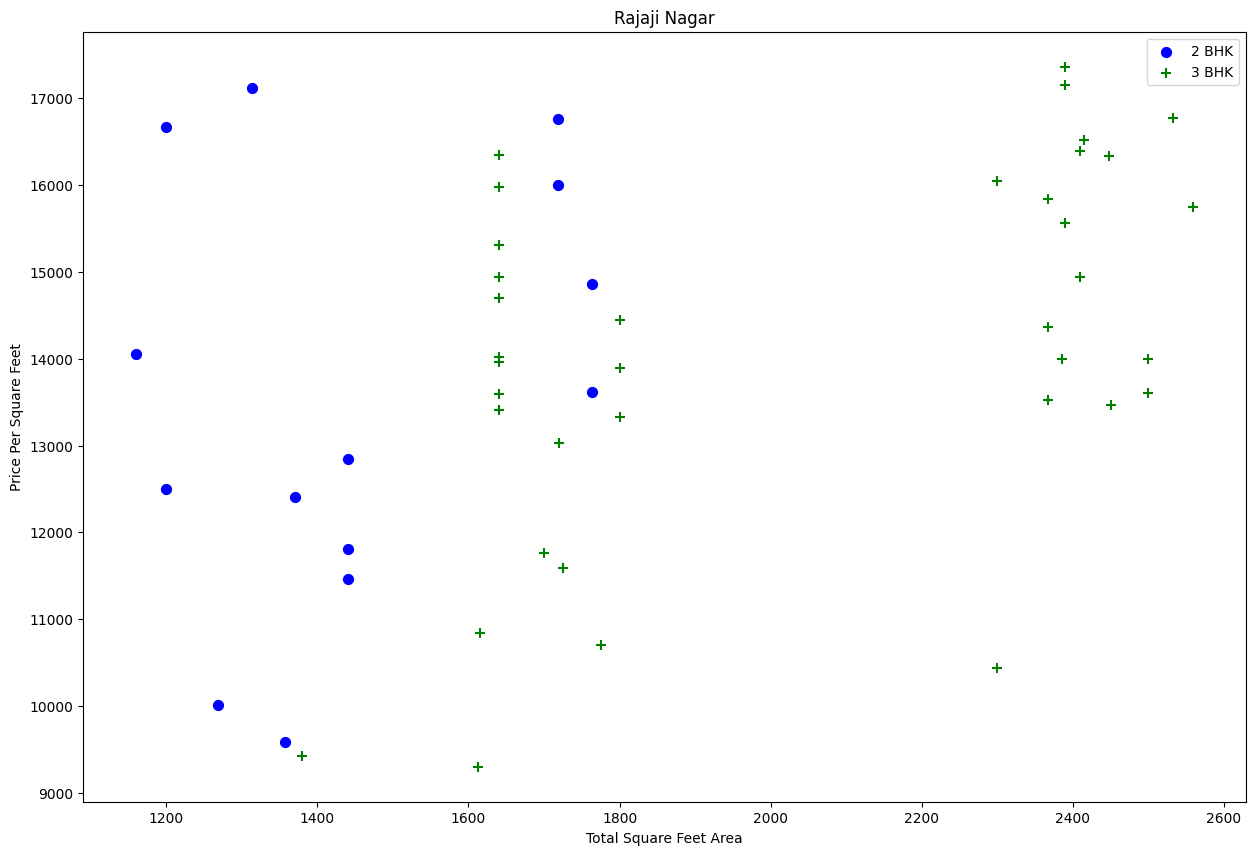

In [54]:
plot_scatter_chart(df6,"Rajaji Nagar")

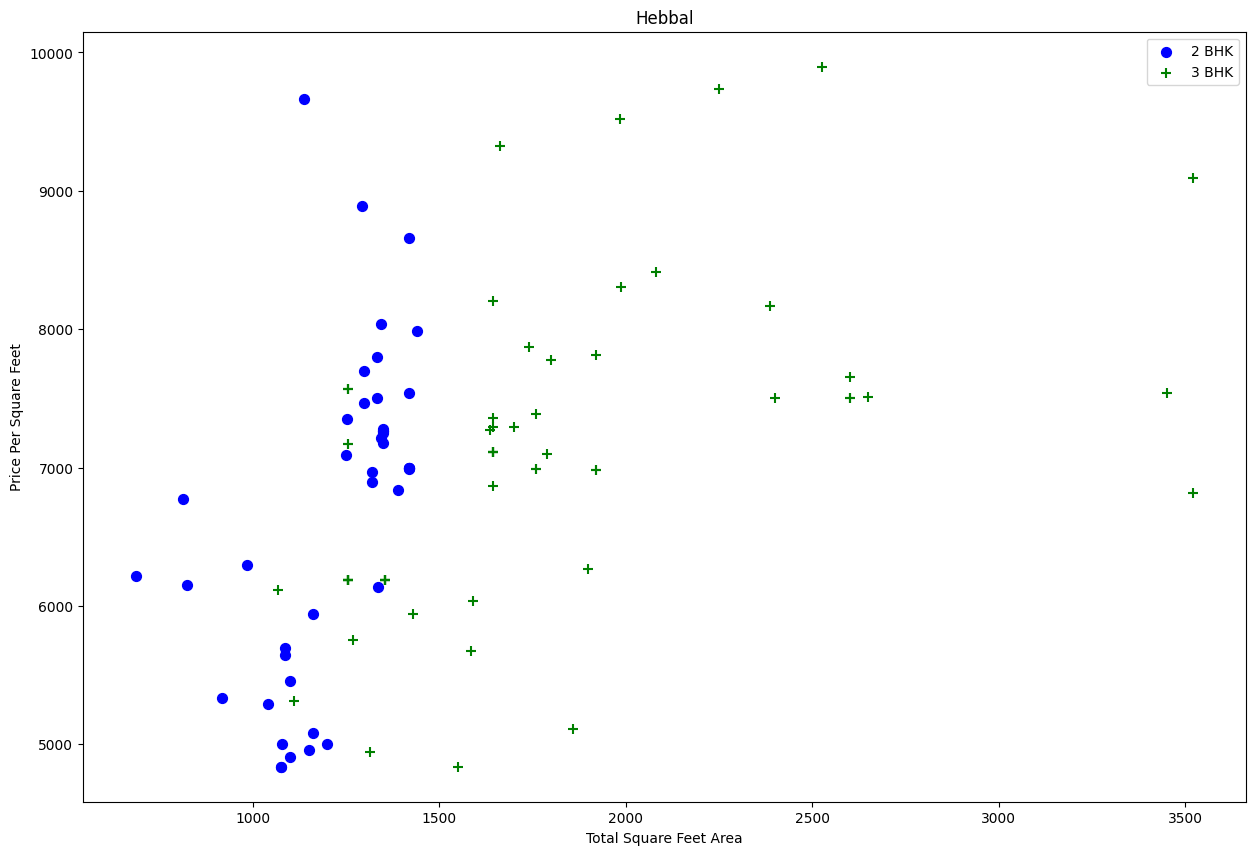

In [55]:
plot_scatter_chart(df6,"Hebbal")